# ESERCIZI MONTE CARLO 

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import time as tm
from scipy.stats import norm
from scipy.stats import lognorm
from scipy.integrate import cumtrapz

In [34]:
# costruisci il generatore di numeri casuali con distribuzione uniforme tra 0 e 1
def montecarlo(seed, A, C, M):
  x = seed
  numbers = []

  for i in range(M):
    x = (A * x + C) % M
    if (x in numbers):
      break
    else:
      numbers.append(x)
      seed = x

  return numbers


numbers = montecarlo(11, 36 + 1, 3, int(2**11))
print(numbers)

[410, 837, 252, 1135, 1038, 1545, 1872, 1683, 834, 141, 1124, 631, 822, 1745, 1080, 1051, 2026, 1237, 716, 1919, 1374, 1689, 1056, 163, 1938, 29, 1076, 903, 646, 1377, 1800, 1067, 570, 613, 156, 1679, 686, 809, 1264, 1715, 2018, 941, 4, 151, 1494, 2033, 1496, 59, 138, 1013, 620, 415, 1022, 953, 448, 195, 1074, 829, 2004, 423, 1318, 1665, 168, 75, 730, 389, 60, 175, 334, 73, 656, 1747, 1154, 1741, 932, 1719, 118, 273, 1912, 1115, 298, 789, 524, 959, 670, 217, 1888, 227, 210, 1629, 884, 1991, 1990, 1953, 584, 1131, 890, 165, 2012, 719, 2030, 1385, 48, 1779, 290, 493, 1860, 1239, 790, 561, 280, 123, 458, 565, 428, 1503, 318, 1529, 1280, 259, 1394, 381, 1812, 1511, 614, 193, 1000, 139, 1050, 1989, 1916, 1263, 1678, 649, 1488, 1811, 1474, 1293, 740, 759, 1462, 849, 696, 1179, 618, 341, 332, 2047, 2014, 793, 672, 291, 530, 1181, 692, 1031, 1286, 481, 1416, 1195, 1210, 1765, 1820, 1807, 1326, 1961, 880, 1843, 610, 45, 1668, 279, 86, 1137, 1112, 187, 778, 117, 236, 543, 1662, 57, 64, 323, 1714

<function matplotlib.pyplot.show(close=None, block=None)>

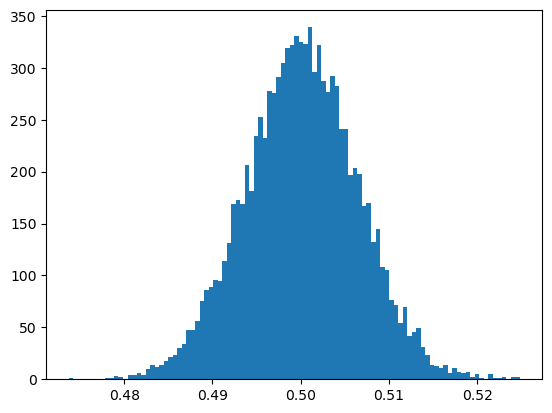

In [35]:
# dobbiamo estrarre un sample di 2000 punti random da una distribuzione uniforme tra 0 e 1
#calcolare il valore medio, ripetere l'operazione mille volte 
#vedere qual è la distribuzione degli xi

mean_values = []
Nset = 10000
for i in range(Nset): 
    data = np.random.uniform(0,1,2000)
    mean = np.mean(data)
    mean_values.append(mean)
    
plt.hist(mean_values, bins = 100)
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

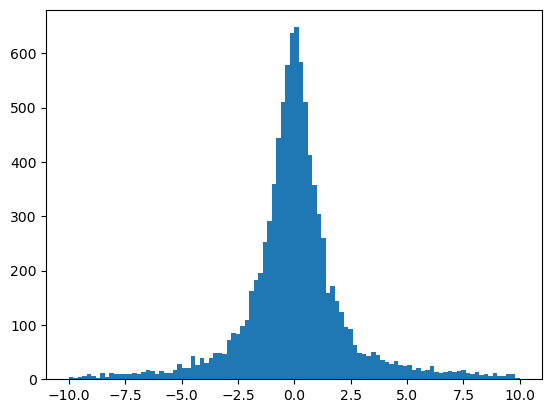

In [36]:
mean_values = []
Nset = 10000
for i in range(Nset): 
    data = np.random.standard_cauchy(2000)
    mean = np.mean(data)
    mean_values.append(mean)
    
plt.hist(mean_values, bins = 100,range = [-10,10])
plt.show


# osserva che continua a seguire Chauchy e non Gaussiana come direbbe il teorema del limite centrale

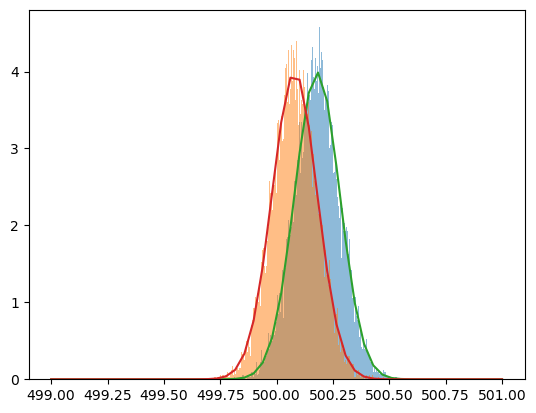

In [37]:
# grafica due distribuzioni Gaussiane (estrai Monte Carlo 10^4 valori) e la distribuzione attesa
# per le gaussiane (mu = 500.18 e 500.08, sigma1 = 0.1 e sigma2 = 0.8) 

Ndati = 10000

mu1 = 500.18
sigma1 = 0.1

mu2 = 500.08
sigma2 = 0.1

data1 = np.random.normal(mu1,sigma1,Ndati)
plt.hist(data1, bins = 500,range = [499,501],density = True, alpha = 0.5) #density normalizza

data2 = np.random.normal(mu2,sigma2,Ndati)
plt.hist(data2, bins = 500, range = [499,501],density = True,alpha = 0.5) #alpha regola la trasparenza dell'istogramma

# Crea un'array di valori x da usare per il plot della curva gaussiana
x1 = np.linspace(499,501)
# Calcola i valori y per la curva gaussiana
y1 = 1/(sigma1 * np.sqrt(2 * np.pi)) * np.exp( - (x1 - mu1)**2 / (2 * sigma1**2))
# Plotta la curva gaussiana
plt.plot(x1, y1)


# Crea un'array di valori x da usare per il plot della curva gaussiana
x2 = np.linspace(499,501)
# Calcola i valori y per la curva gaussiana
y2 = 1/(sigma2 * np.sqrt(2 * np.pi)) * np.exp( - (x2 - mu2)**2 / (2 * sigma2**2))
# Plotta la curva gaussiana
plt.plot(x2, y2)

# Mostra il grafico
plt.show()



<function matplotlib.pyplot.show(close=None, block=None)>

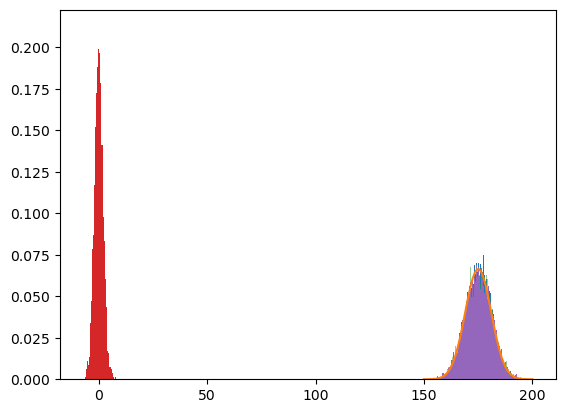

In [38]:
# genera la distribuzione di altezze misurate, sapendo che in media un uomo è alto 175 cm
# la deviazione standard sulla media è 6 cm
# ogni altezza viene misurata con un errore che ha valore di aspettazione nullo e deviazione standard di 2 cm
# fai l'istogramma delle misure delle persone e plotta il relativo grafico che mi aspetto segua

#genero un set di 10000 altezze di persone -- se io ho fatto delle misure che sono media di altre misure, so che ho una gaussiana
mu = 175
sigma = 6 
ndati = 10000
nbins = 200
altezze = np.random.normal (mu,sigma,ndati)
plt.hist(altezze,bins = nbins, density = True)

x = np.linspace(150,200)
#y = 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (x - mu)**2 / (2 * sigma**2))
y = norm.pdf(x,loc = mu, scale = sigma) # così è più facile costruire la gaussiana
plt.plot(x, y)

#faccio estrarre dalla gaussiana un valore (per 10000 volte che equivale ad estrarre una misura di una persona)
# il dato avrà deviazione standard di 2cm 
# faccio quindi l'istogramma dei dati estratti e vedo se si sovrappone a quello che mi aspetto teoricamente
sigmaerr = 2
#altezzemisurate = []
#N.B: for i in range(ndati):
   # altezzai = np.random.normal (altezze[i],sigmaerr)
    #altezzemisurate.append(altezzai)
#invece di fare così potevo direttamente estrarre 1000 valori con sigma 2
altezzemisurate = np.random.normal (altezze,sigmaerr,10000)   
plt.hist(altezzemisurate,bins = nbins, density = True, alpha = 0.5)
#vedo che si sovrappongono : le misure sono in accordo con quello che mi aspettavo 

#NB : questo è equivalente a altezzamisurata = altezze + residui 
#residui = altezzemisurate - altezze #sono una distribuzione gaussiana centrata in zero con sigma 2
residui = np.random.normal (0,sigmaerr,10000)
plt.hist(residui,bins = nbins, density = True)
plt.hist(altezze + residui,bins = nbins, density = True)


plt.show


# CONVOLUZIONE

Quando ho due processi aleatori indipendenti, la distribuzione della combinazione dei due processi è la convoluzione tra le due distribuzioni di probabilità. 

C(x) = integral(G1(x-tau)*G2(x)dtau)

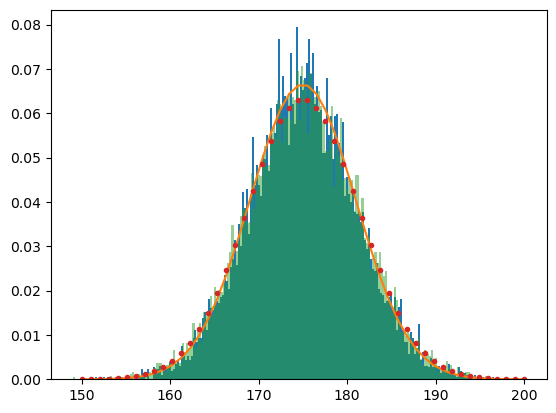

In [39]:
mu = 175
sigma = 6 
ndati = 10000
nbins = 200
altezze = np.random.normal (mu,sigma,ndati)
plt.hist(altezze,bins = nbins, density = True)

x = np.linspace(150,200)
y = 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (x - mu)**2 / (2 * sigma**2))
plt.plot(x, y)

sigmaerr = 2
residui = np.random.normal (0,sigmaerr,10000)
altezzemisurate = altezze + residui
plt.hist(altezzemisurate,bins = nbins, density = True, alpha = 0.5)

plt.show

# ora facciamo la convoluzione tra le due distribuzioni: residui e altezze, dovremmo ottenere la distribuzione del secondo istogramma
tau = x #intervallo centrato intorno alla media di g1
dtau = tau[1] - tau[0] # passo della griglia

def g1(x): 
    return norm.pdf(x, loc = 175, scale = 6) #pdf è la mia pdf cioè funzione di distribuz. di probabilità
def g2(x): 
    return norm.pdf(x, loc = 0, scale = 2)
    
convoluz = np.zeros_like(tau) # costruisce un vettore lungo quanto tau di tutti zeri 
for i, t in enumerate(tau): 
    prodotto = g1(tau)*g2(t-tau)
    convoluz[i] = np.trapz(prodotto, dx = dtau) #trapz fa l'integrale
plt.plot(tau,convoluz,'.')

Nel caso di due gaussiane è facile, perchè si osserva che la convoluzione di due Gaussiane è ancora una gaussiana, con valore di aspettazione la somma dei valori di aspettazione e come varianza la somma in quadratura delle varianze. Quindi potrei tranquillamente tracciare la funzione convoluta analiticamente. 
In altri casi però non posso scrivere "a mano" la funzione data dalla convoluzione poichè non sempre la convoluzione di due distribuzioni ha una soluzione analitica. 
Quello che possiamo fare è quindi ad esempio la convoluzione di una gaussiana e di una lognormale. In questo caso la soluzione analitica della convoluzione non esiste, ma posso tracciarla con i metodi numerici usati sopra, quindi attraverso la simulazione Montecarlo e un processo di tipo discreto. 
Esempio tipico in astrofisica è un ammasso di galassie: ho tutti oggetti con la stessa massa, la massa del gas contenuta in questi oggetti astrofisici qua può essere descritta da una lognormale, perchè i campi sono descritti in scala logaritmica, quindi sempre usando il "mean theorem" invece di usare una gaussiana usiamo una lognormale (gaussiana in spazio logaritmico). 
Quindi questa è la distribuzione della massa di gas. 
Dopodichè faccio la misura, trovate quanta massa di gas vedete, ma questa è una misura che ha un suo errore, che segue una distribuzione normale. Quindi che distribuzione osserviamo noi? Osserveremo la distribuzione data dalla convoluzione della distribuzione degli errori con quella delle masse del gas.
Questa però non ha una forma analitica chiusa, l'unica soluzione è risolvere la convoluzione algebricamente, o usare librerie che lo fanno, oppure ancora creare un cammpione Montecarlo delle due distribuzioni e procedere come visto. 

<function matplotlib.pyplot.show(close=None, block=None)>

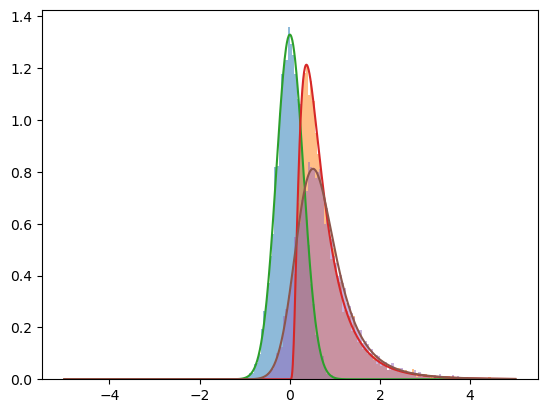

In [66]:
# proviamo di nuovo a fare una cosa simile, ma sta volta non con due gaussiane, ma una con una distrubuzione normale, una con una log-normale
!! NB: è la distribuzione di probabilità di una variabile aleatoria X il cui logaritmo logX segue una distribuzione normale

#generiamo i set di dati
ndati = 10000
munorm = 0
mulog = np.log(0.6)
sigmanorm = 0.3
sigmalog = 0.7

datanorm = np.random.normal(munorm, sigmanorm, ndati)
datalog = np.random.lognormal(mulog,sigmalog,ndati)

#istogrammiamo i due istogrammi con la rispettiva aspettazione teorica
plt.hist(datanorm, bins = 200, density = True, alpha = 0.5,range = [-5,5])
plt.hist(datalog, bins = 200, density = True, alpha = 0.5, range = [-5,5])

x = np.linspace(-5,5,1000) #1000 numero punti in cui campiono la funzione
def g1(x): 
    return norm.pdf(x, loc = munorm, scale = sigmanorm)
ynorm = g1(x)

def g2(x): 
    return lognorm.pdf(x, sigmalog, scale = np.exp(mulog))
ylog = g2(x)

plt.plot(x,ynorm)
plt.plot(x,ylog)

#facciamo l'istogramma della convoluzione
dataconv = datanorm + datalog
plt.hist(dataconv,bins = 200, density = True, alpha = 0.5,range = [-5,5])

#ora facciamo la convoluzione
tau = x #intervallo centrato intorno alla media di g1
dtau = tau[1] - tau[0] # passo della griglia
convoluz = np.zeros_like(tau) # costruisce un vettore lungo quanto tau di tutti zeri 
for i, t in enumerate(tau): 
    prodotto = g1(tau)*g2(t-tau)
    convoluz[i] = np.trapz(prodotto, dx = dtau) #trapz fa l'integrale
plt.plot(tau,convoluz,'-')
            
plt.show

# Quanto vale il valore di aspettazione e l'incertezza della convoluzione (sono arbitrari, quali potresti scegliere)? 
Prova a rispondere in due modi: dalla curva trovata per convoluzione e dalla simulazione Monte Carlo. 
Devo avere un valore medio/mediano, e due che mi dicano che la distribuzione è assimmetrica e mi esprimano l'incertezza. 
Quello che voglio sapere è quali sonoo gli estremi per cui integrando tra tali trovo una certa probabilità, cioè un certo valore dell'integrale della funzione di cumulazione. 
Ad esempio di solito tra mu-sigma e mu+sigma per la Gaussiana ho associato una probabilità pari a 0.68 di trovare il valore vero. 

Se scrivo ad esempio H0 = 70(mediana)+4/-2 vuol dire che a destra (tra 70 e 74) ho 84% e a sx(tra 68 e 79) ho 16%. 

from scipy.integrate import cumtrapz; 

cumulativa = cumtrapz(yarr,xarr)

RICORDA: la funzione cumulativa F(a) = int(0,a) di y in dx (dove 0 è il minimo del dominio)
Per sapere qual è la probabilità che la mia variabile casuale cada tra a e b>a è F(b)-F(a)


!! DAL PV MONTECARLO: estraggo un campione montecarlo che segue una certa distribuzione e faccio l'istogramma. Poi ogni dato estratto, ha un errore di misura con una certa distribuzione (es gaussiana centrata in zero e dev std 2). La cumulazione è data dalla somma dei dati generati dai due Montecarlo: cioè ogni dato dell'istogramma della convoluzione è dato dalla somma dato per dato dei due istogrammi.
 - di fatto quello che faccio è "estraggo un numero casuale che è una misura teorica", poi "estraggo un altro valore casuale che è l'errore sulla misura teorica", la misura effettiva sarà data dalla misura teorica più errore rispettivo - 
 (infatti se faccio la differenza tra valore misurato e valore "teorico" trovo una gaussiana centrata in zero e con dev std 2). 
 
!!questo avviene ogni volta che ho due processi stocastici indipendenti: altrimenti devo tener conto della covarianza, non posso sommare semplicemente i due dati, dovrei anche sottrarre la parte correlata dei due

In [67]:
#PROCEDIAMO CON LA CONVOLUZIONE
#troviamo il massimo dell'array convoluzione
moda = max(convoluz)
print(moda)

# devo quindi trovare la x per cui ho il massimo 
#pos = np.where(convoluz == moda)
pos = np.argmax(convoluz)

#posmoda = float(pos[0])
#print(posmoda)
#ad ogni covoluz[i] è associato un x[i]: mi basterà quindi prendere il valore di x della posizione corrispondente alla stessa posizione di convoluz in cui ho il valore massimo
xmoda = float(x[pos])
print("xmoda = ", xmoda)

# quindi a questo punto devo calcolare le incertezze: sono arbitrarie le probabilità che voglio a destra e sinistra
# l'idea è che vorrei che la probabilità che l'evento cada fuori sia 0.32 (1-0.68), 0.16 nella coda iniziale, e 0.16 nella coda finale
cumulativa = cumtrapz(convoluz, x)

#una buona idea è calcolare la mediana invece della moda

for i in range(len(x)): 
    if (cumulativa[i]>0.5): 
        xmediana = x[i]
        break
print("xmediana =", xmediana)

for i in range (len(x)): 
    if (cumulativa[i]>0.16):
        xmin = x[i]
        break
print("xmin =", xmin)

for i in range (len(x)): 
    if (cumulativa[i]>0.84):
        xmax = x[i]
        break
print("xmax =", xmax)

0.8120433475128545
xmoda =  0.5155155155155153
xmediana = 0.6456456456456454
xmin = 0.19519519519519513
xmax = 1.2862862862862858


In [68]:
# DAL PUNTO DI VISTA MONTE CARLO --> esistono delle funzioni che fanno tutto loro, dando solamente gli istogrammi
# L'ALPHESIMO-PERCENTILE è il valore x per cui se faccio l'integrale tra 0 (o cmq l'estremo sx del dominio) e x ottengo alpha%. 
# NB: il percentile 0.5 (=50 percento) è la mediana
risultato = np.percentile(datanorm + datalog,[50,16,84])
print(risultato)


[0.64479082 0.1899945  1.3067198 ]


Risulta molto utile quindi avere delle simulazioni (dei campioni di dati) che mi portano ad avere una certa distribuzione nota in partenza.
Nell'inferenza, faremo il contrario, da un dataset sintetico ricavo i parametri. 

# INDOVINELLI 
1. Qual è la probabilità di pescare una pallina rossa da due sacchetti uno con 4 palline rosse e 6 blu, e uno con tutte e 10 le palline rosse? 
Sarà 1/2 + 1/2*6/10 = 70% 

2. Ho due monete, una con due teste, una con testa-croce. Faccio un lancio trovo testa. Qual è la probabilità di aver lanciato la moneta con due teste? 
!!! Il fatto di aver già fatto un lancio, mi permette di sapere qualcosa in più rispetto a non averne fatto nessuno, perchè essendosi già verificato un evento, i casi possibili si sono ridotti. A me infatti interessano solo quali sono i CASI POSSIBILI *DI OTTENERE TESTA*, e questi sono tre: due casi dalla moneta uno, un caso dalla moneta doubleface. I casi favorevoli sono invece solo quelli che riguardano l'*aver ottenuto testa* (perchè ormai questa ho), dalla moneta con solo teste, quindi sono 2/3, perchè 2 dei miei tre casi possibili sono favorevoli. 